# # 3 zajęcia: Dopasowanie modelu do danych rzeczywistych
    
    Wczytywanie pliku z internetu wygląda tak jak na poprzednim laboratorium. Ponadto umieszczam w tej sekcji importy oraz tabelę ilustrującą dane o rzekach.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
import requests
from bs4 import BeautifulSoup

URL = 'https://en.wikipedia.org/wiki/List_of_rivers_of_Belarus'
resp = requests.get(URL)
if resp.status_code == 200:
    soup = BeautifulSoup(resp.content,'html.parser')
    tab = soup.find('table',{'class':"wikitable"})
    df = pd.read_html(str(tab))[0]
df

,Name,"Total, km","In Belarus, km"
0,Dnieper River,2145,690
1,Western Dvina,1020,328
2,Neman River,937,459
3,Bug River,831,169
4,Pripyat River,761,495
5,Sozh River,648,493
6,Berezina River,613,613
7,Vilija,510,276
8,Ptsich,421,421
9,Shchara,325,325


    To laboratorium wymaga utworzenia oraz wyćwiczenia modelu, dlatego musimy podzielić powyższą tabelę na dwa zbiory. Niech badana zależność będzie następująca: sprawdzamy czy ogólna długość rzeki wpływa na jej długość w kraju.

In [4]:
X = df['Total, km'].values
Y = df['In Belarus, km'].values

print('Długości całkowite rzek: %s' % X)
print('Długości rzek w kraju: %s' % Y)


Długości całkowite rzek: [2145 1020  937  831  761  648  613  510  421  325  297]
Długości rzek w kraju: [690 328 459 169 495 493 613 276 421 325 297]


    Zanim przejdziemy do budowy modelu zobaczmy jak nasze dane przedstawione są na wykresie.

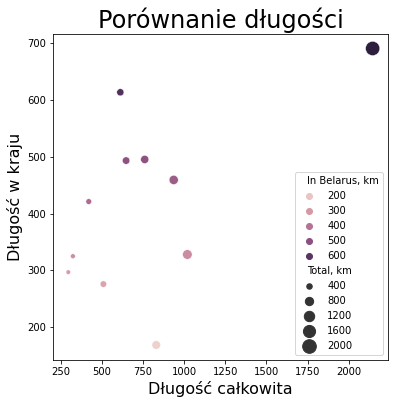

In [5]:
import seaborn as sns

plt.figure(figsize=(6,6))
sns.scatterplot(
    x = 'Total, km',
    y = 'In Belarus, km',
    data = df,
    hue = 'In Belarus, km',
    size = 'Total, km',
    sizes = (20, 200),
    legend = 'brief'
)
plt.xlabel("Długość całkowita", size=16)
plt.ylabel("Długość w kraju", size=16)
plt.title("Porównanie długości", size=24)
plt.show()

## Metoda prób i błędów.

   Metoda prób i błędów pozwala wyznaczyć przybliżony model liniowy. Nie jest on idealny, ponieważ jak widzimy błąd średniokwadratowy jest bardzo duży. Do policzenia błędu korzystam z następującego wzoru:

$$e_i=y_i-\overline{y_i}.$$

\begin{equation}
Q(a,b) = \frac{1}{N}\sum_{i=1}^Ne_i^2 \ ,
\tag{2}
\end{equation}

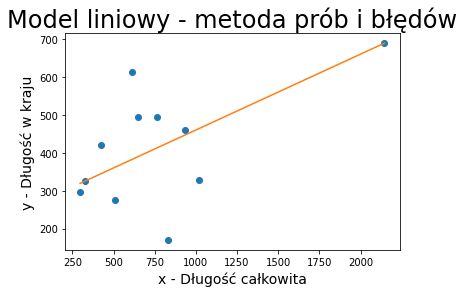

Błąd przybliżenia wynosi: 15382.81


In [6]:
def model (parametry, x):
    a, b = parametry
    return a * x + b

# dobieramy liczby tak żeby 'pasowało'
a_est, b_est = 0.2, 260

# liczymy błąd
dataSize = X.size
error = 0
for i in range(0, dataSize):
    error = error + ( ( Y[i] - ( a_est * X[i] + b_est ) ) ) ** 2

# rysujemy wykres
X_test = np.linspace(start = X.min(), stop = X.max(), num = 300)
Y_pred = model(parametry = [a_est, b_est], x = X_test)

plt.scatter(X,Y)
plt.plot(X_test, Y_pred, color = 'tab:orange')
plt.xlabel('x - Długość całkowita', fontsize = 14)
plt.ylabel('y - Długość w kraju', fontsize = 14)
plt.title('Model liniowy - metoda prób i błędów', size = 24)
plt.show()

# wyświetlamy błąd
print('Błąd przybliżenia wynosi: %s' % str(round(error / dataSize, 2)) )

## Metoda analityczna
   Ta metoda jest skuteczniejsza, jednak nie aż tak jak metod biblioteczne języka python. Korzystam tutaj z metody najmniejszych kwadratów poznanej na wykładzie, czyli z następujących wzorów:

$$a = \frac{\left( \sum^{n}_{i = 1} x_i y_i \right) - n \cdot \overline{x} \cdot \overline{y}}{\left( \sum^{n}_{i = 1} x_{i}^2 \right) - n \cdot \overline{x}^2}$$

$$b = \overline{y} - a \cdot \overline{x}$$


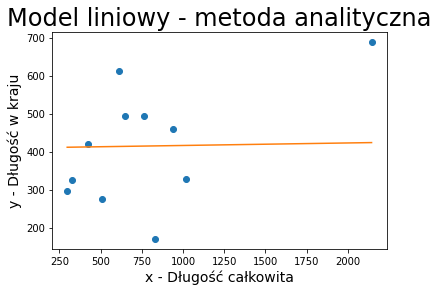

parametr a estymowany metodą najmniejszych kwadratów wynosi 0.0066
parametr b estymowany metodą najmniejszych kwadratów wynosi 409.95
Błąd przybliżenia wynosi: 21183.7


In [7]:
def model (parametry, x):
    a, b = parametry
    return a * x + b

xAvr = X.mean()
yAvr = Y.mean()
dataSize = X.size

a_est = 0
b_est = 0

# liczymy a
# licznik
up = 1
for i in range(0, dataSize):
    up = up + ( X[i] * Y[i] )
up = up - ( dataSize * xAvr * yAvr )

# mianownik
down = 1
for i in range(0, dataSize):
    down = down + X[i]
down = down ** 2 - ( dataSize * xAvr**2 )

# wynik
a_est = up / down


# liczymy b
b_est = yAvr - ( a_est * xAvr )


# liczymy błąd
error = 0
for i in range(0, dataSize):
    error = error + ( ( ( Y[i] - ( a_est * X[i] + b_est ) ) ) ** 2 )

# rysujemy wykres
X_test = np.linspace(start = X.min(), stop = X.max(), num = 300)
Y_pred = model(parametry = [a_est, b_est], x = X_test)

plt.scatter(X,Y)
plt.plot(X_test, Y_pred, color = 'tab:orange')
plt.xlabel('x - Długość całkowita', fontsize = 14)
plt.ylabel('y - Długość w kraju', fontsize = 14)
plt.title('Model liniowy - metoda analityczna', size = 24)
plt.show()

# wyświetlamy wyliczone wartości
print('parametr a estymowany metodą najmniejszych kwadratów wynosi %s' % round(a_est, 4))
print('parametr b estymowany metodą najmniejszych kwadratów wynosi %s' % round(b_est,2))
print('Błąd przybliżenia wynosi: %s' % str(round(error / dataSize, 2)) )

## Model i testy

   Budowa oraz ćwiczenie modelu wymagają utowrzenia dodatkowych zbiorów testowych. Musimy zatem podzielić nasz zbiór X na zbiór treningowy: X_train oraz zbiór testowy X_test. Analogicznie postępujemy dla zbioru Y.
   Mamy na wykresie narysowane dwa modele: liniowy oraz uogólniony liniowy. Ponadto zaznaczone jest które rzeki zostały wzięte do treningu a które do testów.

Parametry modelu liniowego: [0.07011], 380.37211
Błąd średniokwadratowy modelu liniowego: 3.63e+04

Parametry modelu GLM: [ 0.0000e+00  2.0474e+00 -1.5000e-03], -216.49112
Błąd średniokwadratowy modelu GLM: 3.45e+06



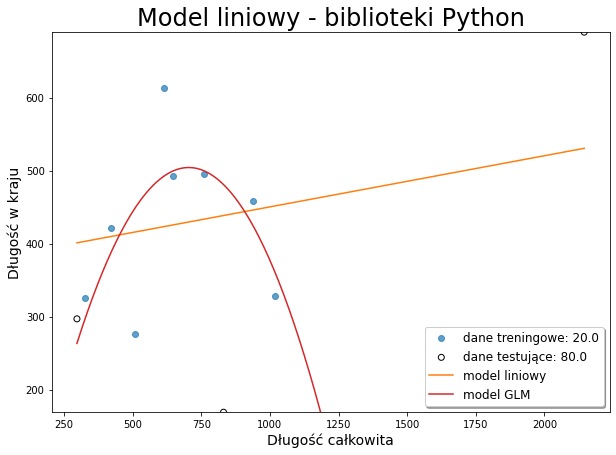

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X = df['Total, km'].values
Y = df['In Belarus, km'].values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

def showPlot(percentTrain, percentTest):
    # =========  Model liniowy =========
    from sklearn.linear_model import LinearRegression
    model_lin = LinearRegression()
    model_lin.fit(X_train.reshape(-1,1), Y_train)
    print(f'Parametry modelu liniowego: {np.round(model_lin.coef_,5)}, {np.round(model_lin.intercept_,5)}')
    MSE_lin = mean_squared_error(Y_test, model_lin.predict(X_test.reshape(-1,1)))
    print(f'Błąd średniokwadratowy modelu liniowego: {MSE_lin:0.3}\n')

    # ===== Uogólniony model liniowy (ang. Generalized Linear Model) =====
    from sklearn.preprocessing import PolynomialFeatures
    model_GLM = LinearRegression()
    gen_features = PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)
    model_GLM.fit(gen_features.fit_transform(X_train.reshape(-1,1)), 
              Y_train)
    print(f'Parametry modelu GLM: {np.round(model_GLM.coef_,4)}, {np.round(model_GLM.intercept_,5)}')
    MSE_GLM = mean_squared_error(Y_test, model_GLM.predict(gen_features.fit_transform(X_test.reshape(-1,1))))
    print(f'Błąd średniokwadratowy modelu GLM: {MSE_GLM:0.3}\n')

    # Predykcje wszystkich modeli dla całego zakreso osi X
    os_x = np.linspace(start=X.min(), stop=X.max(), num=300)
    y_lin_pred = model_lin.predict(os_x.reshape(-1,1))
    y_GLM_pred = model_GLM.predict(gen_features.fit_transform(os_x.reshape(-1,1)))

    # Wizualizacja
    plt.figure(figsize=(10,7))
    plt.scatter(X_train, Y_train, label='dane treningowe: %s' % str(percentTrain * 100), alpha=0.7)
    plt.scatter(X_test, Y_test, edgecolor='black', facecolor='none', label='dane testujące: %s' % str(percentTest * 100))
    plt.plot(os_x, y_lin_pred, label='model liniowy', color='tab:orange')
    plt.plot(os_x, y_GLM_pred, label=f'model GLM', color='tab:red')
    plt.xlabel('Długość całkowita', fontsize=14)
    plt.ylabel('Długość w kraju', fontsize=14)
    plt.title('Model liniowy - biblioteki Python', size=24)
    plt.legend(fontsize=12, shadow=True, loc='lower right')
    plt.ylim([Y.min()-0.1, Y.max()+0.5])
    plt.show()
    
showPlot(0.2, 0.8)

   Co by się stało gdybyśmy zwiększyli ilość danych do testów? Czy zmienił by się kształt któregoś z wykresów? Sprawdźmy to doświadczalnie: za pierwszym razem weźmy 30% danych do testów a za drugim 50%.

Parametry modelu liniowego: [0.18043], 278.4813
Błąd średniokwadratowy modelu liniowego: 3.4e+04

Parametry modelu GLM: [0.     0.0752 0.    ], 320.94017
Błąd średniokwadratowy modelu GLM: 3.31e+04



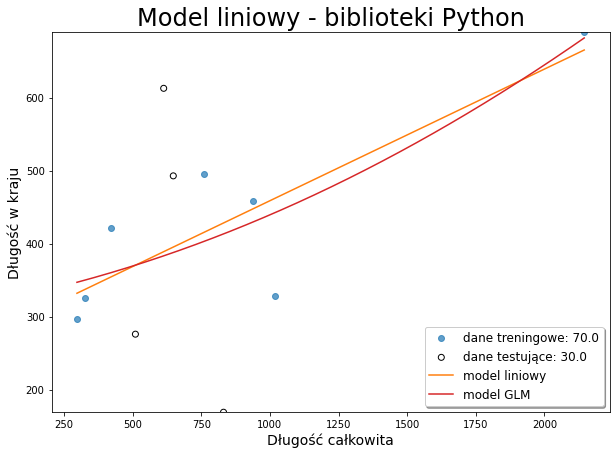

In [46]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)
showPlot(0.7, 0.3)

Parametry modelu liniowego: [0.21806], 240.60302
Błąd średniokwadratowy modelu liniowego: 2.66e+04

Parametry modelu GLM: [ 0.000e+00  4.386e-01 -1.000e-04], 145.80186
Błąd średniokwadratowy modelu GLM: 3.11e+04



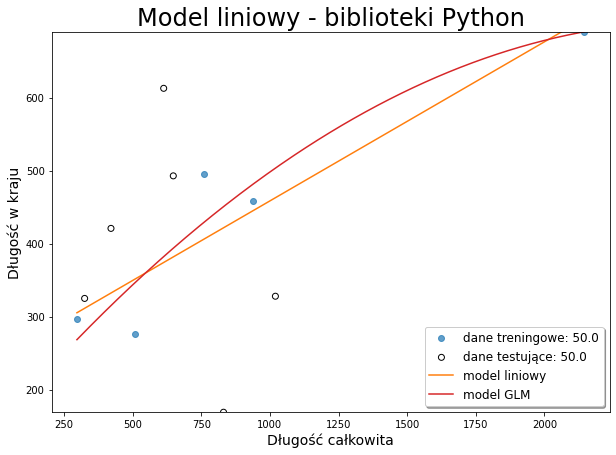

In [47]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.5)
showPlot(0.5, 0.5)

 Sprawdźmy jeszcze przypadek skrajny: 99% danych treningowych oraz 1% danych testujących

Parametry modelu liniowego: [0.18114], 252.29269
Błąd średniokwadratowy modelu liniowego: 6.23e+04

Parametry modelu GLM: [ 0.     -0.0619  0.0001], 355.65015
Błąd średniokwadratowy modelu GLM: 6.64e+04



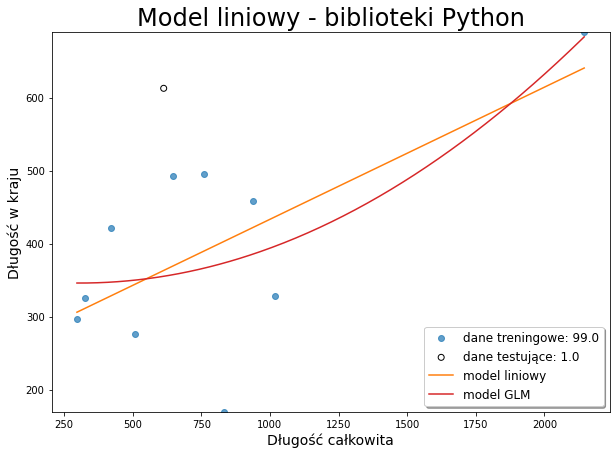

In [50]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.01)
showPlot(0.99, 0.01)